# Predicting Patients Survival
A hospital has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

The goal here is to develop a machine learning model that will predict the chances of survival of a patient after 1 year of treatment.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_advc.csv')

In [3]:
pharma_data.head()

ID_Patient_Care_Situation  ...  Survived_1_year
0                      16201  ...                1
1                       9421  ...                0
2                      16205  ...                1
3                       5582  ...                0
4                      20880  ...                1

[5 rows x 18 columns]

In [4]:
pharma_data.shape

(25079, 18)

In [5]:
pharma_data.nunique()

ID_Patient_Care_Situation    23097
Diagnosed_Condition             53
Patient_ID                   10599
Treated_with_drugs             182
Patient_Age                     74
Patient_Body_Mass_Index      10599
Patient_Smoker                  10
Patient_Rural_Urban              2
Patient_mental_condition         1
A                                2
B                                2
C                                2
D                                2
E                                2
F                                2
Z                                2
Number_of_prev_cond              5
Survived_1_year                  2
dtype: int64

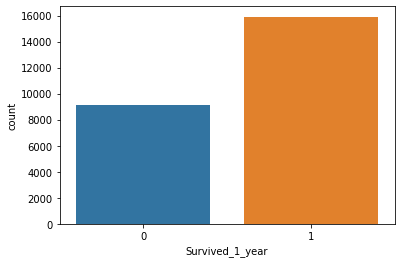

In [6]:
sns.countplot(pharma_data['Survived_1_year'])
plt.show()

In [7]:
pharma_data['Survived_1_year'].value_counts()

1    15908
0     9171
Name: Survived_1_year, dtype: int64

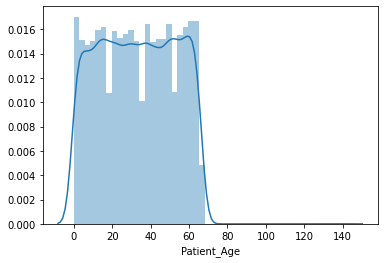

In [8]:
sns.distplot(pharma_data['Patient_Age'])
plt.show()

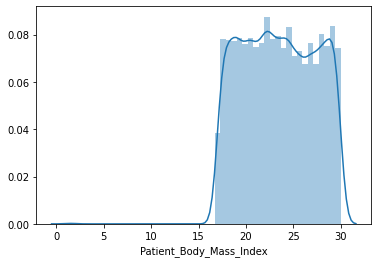

In [9]:
sns.distplot(pharma_data['Patient_Body_Mass_Index'])
plt.show()

In [10]:
pharma_data.Patient_Smoker.unique()

array(['NO', 'NO ', 'YES', 'YES ', 'YESS ', 'YESS', 'Cannot say ',
       'Cannot say', 'CANNOT SAY ', 'CANNOT SAY'], dtype=object)

In [11]:
patient_smoker_replace = {"NO ":"NO", "YES ":"YES", "YESS ":"YES", "YESS":"YES", "Cannot say ":"Cannot say", "CANNOT SAY ":"Cannot say", "CANNOT SAY":"Cannot say"}
pharma_data = pharma_data.replace({"Patient_Smoker": patient_smoker_replace})

In [12]:
pharma_data.Patient_Smoker.unique()

array(['NO', 'YES', 'Cannot say'], dtype=object)

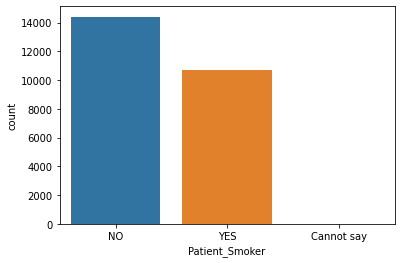

In [13]:
sns.countplot(pharma_data['Patient_Smoker'])
plt.show()

In [14]:
pharma_data['Patient_Smoker'].value_counts()

NO            14402
YES           10669
Cannot say        8
Name: Patient_Smoker, dtype: int64

In [15]:
pharma_data["Patient_Smoker"].replace({"NO":0, "YES":1, "Cannot say":2}, inplace=True)

In [16]:
pharma_data.Patient_mental_condition.unique()

array(['Stable'], dtype=object)

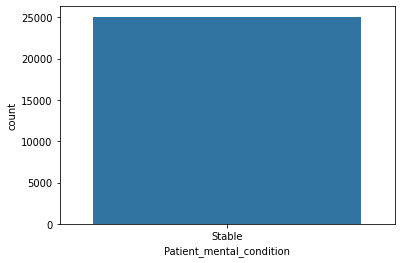

In [17]:
sns.countplot(pharma_data['Patient_mental_condition'])
plt.show()

It is observed that "Patient mental condition" is Stable for all patients

In [18]:
pharma_data["Patient_mental_condition"].replace({"Stable": 1}, inplace=True)

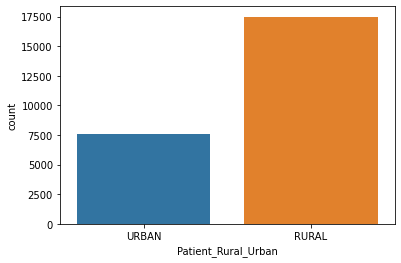

In [19]:
sns.countplot(pharma_data['Patient_Rural_Urban'])
plt.show()

Majority of the patients live in rural environment

In [20]:
pharma_data["Patient_Rural_Urban"].replace({"RURAL":0, "URBAN":1}, inplace=True)

In [21]:
pharma_data.Patient_Rural_Urban.unique()

array([1, 0])

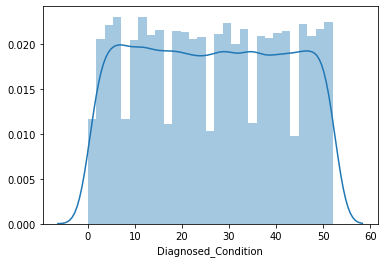

In [22]:
sns.distplot(pharma_data['Diagnosed_Condition'])
plt.show()

In [23]:
pharma_data.sample(3)

ID_Patient_Care_Situation  ...  Survived_1_year
24445                      21644  ...                0
440                        29659  ...                1
19132                      20412  ...                1

[3 rows x 18 columns]

In [24]:
pharma_data.Treated_with_drugs.unique()

array(['DX2', 'DX6', 'Dx6', 'dx6 ', 'dx1', 'dx1 dx3 dx4 ', 'DX5 ', 'dx2 ',
       'dx6', 'DX2 DX5 ', 'DX6 ', 'DX1', 'DX3 DX5', 'DX1 DX3', 'DX3 DX4 ',
       'Dx3', 'DX2 DX3', 'DX1 ', 'DX3', 'dx4', 'Dx2', 'Dx1', 'dx1 ',
       'DX1 DX2 DX3 DX5', 'Dx1 dx3', 'Dx5', 'DX2 ', 'DX4 ', 'DX4', 'dx3 ',
       'DX3 DX4 DX5 ', 'DX1 DX3 ', 'DX2 DX5', 'dx3', 'DX1 DX5', 'DX2 DX4',
       'dx2 dx3 ', 'dx2', 'DX3 DX5 ', 'DX5', 'DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX3 ', 'DX1 DX5 ', 'dx5', 'Dx4', 'DX1 DX3 DX5', 'DX1 DX4 ',
       'DX4 DX5', 'dx4 dx5', 'DX1 DX2 ', 'DX1 DX3 DX5 ', 'dx1 dx4',
       'dx4 dx5 ', 'Dx1 dx4 ', 'Dx1 dx2 dx4 dx5 ', 'DX1 DX2', 'Dx4 dx5',
       'DX1 DX3 DX4', 'DX1 DX2 DX3', 'Dx1 dx2', 'DX1 DX4 DX5 ',
       'Dx1 dx2 ', 'DX1 DX4', 'dx2 dx5', 'dx3 dx4', 'DX3 DX4', 'dx2 dx4',
       'Dx2 ', 'DX3 DX4 DX5', 'Dx5 ', 'Dx1 dx3 ', 'dx3 dx5', 'Dx6 ',
       'DX1 DX3 DX4 ', 'DX1 DX2 DX4', 'dx5 ', 'DX2 DX4 ', 'DX1 DX4 DX5',
       'Dx1 dx2 dx3 dx5', 'dx1 dx3 dx5 ', 'Dx2 dx5', 'dx2 dx3 dx4 ',


## Handle missing values

In [25]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs              8
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1356
B                            1356
C                            1356
D                            1356
E                            1356
F                            1356
Z                            1356
Number_of_prev_cond          1356
Survived_1_year                 0
dtype: int64

In [26]:
pharma_data[pharma_data.isnull().any(axis=1)]

ID_Patient_Care_Situation  ...  Survived_1_year
45                         29462  ...                1
61                          5332  ...                1
76                         19576  ...                1
86                         32024  ...                0
133                        10359  ...                1
...                          ...  ...              ...
24963                      10645  ...                1
24973                      18473  ...                0
24989                      12134  ...                1
24999                       1351  ...                1
25036                      10914  ...                1

[1364 rows x 18 columns]

In [27]:
print("Before filling null values \n", pharma_data['A'].value_counts(), "\n")
pharma_data['A'] = pharma_data['A'].fillna(method="ffill")
print("After filling null values \n", pharma_data['A'].value_counts())

Before filling null values 
 1.0    21211
0.0     2512
Name: A, dtype: int64 

After filling null values 
 1.0    22394
0.0     2685
Name: A, dtype: int64


In [28]:
print("Before filling null values \n", pharma_data['B'].value_counts(), "\n")
pharma_data['B'] = pharma_data['B'].fillna(method="ffill")
print("After filling null values \n", pharma_data['B'].value_counts())

Before filling null values 
 0.0    20496
1.0     3227
Name: B, dtype: int64 

After filling null values 
 0.0    21671
1.0     3408
Name: B, dtype: int64


In [29]:
print("Before filling null values \n", pharma_data['C'].value_counts(), "\n")
pharma_data['C'] = pharma_data['C'].fillna(method="ffill")
print("After filling null values \n", pharma_data['C'].value_counts())

Before filling null values 
 0.0    19372
1.0     4351
Name: C, dtype: int64 

After filling null values 
 0.0    20465
1.0     4614
Name: C, dtype: int64


In [30]:
print("Before filling null values \n", pharma_data['D'].value_counts(), "\n")
pharma_data['D'] = pharma_data['D'].fillna(method="ffill")
print("After filling null values \n", pharma_data['D'].value_counts())

Before filling null values 
 0.0    21737
1.0     1986
Name: D, dtype: int64 

After filling null values 
 0.0    22969
1.0     2110
Name: D, dtype: int64


In [31]:
print("Before filling null values \n", pharma_data['E'].value_counts(), "\n")
pharma_data['E'] = pharma_data['E'].fillna(method="ffill")
print("After filling null values \n", pharma_data['E'].value_counts())

Before filling null values 
 0.0    14323
1.0     9400
Name: E, dtype: int64 

After filling null values 
 0.0    15131
1.0     9948
Name: E, dtype: int64


In [32]:
print("Before filling null values \n", pharma_data['F'].value_counts(), "\n")
pharma_data['F'] = pharma_data['F'].fillna(method="ffill")
print("After filling null values \n", pharma_data['F'].value_counts())

Before filling null values 
 0.0    22432
1.0     1291
Name: F, dtype: int64 

After filling null values 
 0.0    23706
1.0     1373
Name: F, dtype: int64


In [33]:
print("Before filling null values \n", pharma_data['Z'].value_counts(), "\n")
pharma_data['Z'] = pharma_data['Z'].fillna(method="ffill")
print("After filling null values \n", pharma_data['Z'].value_counts())

Before filling null values 
 0.0    23715
1.0        8
Name: Z, dtype: int64 

After filling null values 
 0.0    25069
1.0       10
Name: Z, dtype: int64


In [34]:
pharma_data['Number_of_prev_cond'] = pharma_data[['A', 'B', 'C', 'D', 'E', 'F', 'Z']].sum(axis=1)

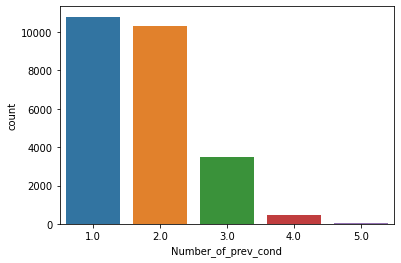

In [35]:
sns.countplot(pharma_data['Number_of_prev_cond'])
plt.show()

In [36]:
pharma_data['Number_of_prev_cond'].value_counts()

1.0    10798
2.0    10311
3.0     3484
4.0      445
5.0       41
Name: Number_of_prev_cond, dtype: int64

Majority of the patients have had at least 1 or 2 conditions in the past

In [37]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].str.upper()  #change the values in this column to upppercase
pharma_drug_dummies = pharma_data['Treated_with_drugs'].str.get_dummies(sep=' ')   #create a dummy dataframe for this column

In [38]:
pharma_drug_dummies.head()

DX1  DX2  DX3  DX4  DX5  DX6
0    0    1    0    0    0    0
1    0    0    0    0    0    1
2    0    0    0    0    0    1
3    0    0    0    0    0    1
4    1    0    0    0    0    0

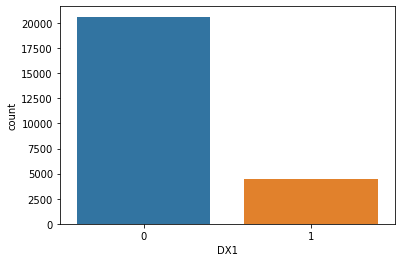

In [39]:
sns.countplot(pharma_drug_dummies['DX1'])
plt.show()

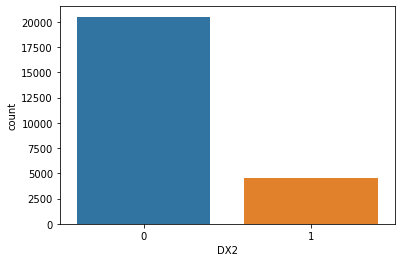

In [40]:
sns.countplot(pharma_drug_dummies['DX2'])
plt.show()

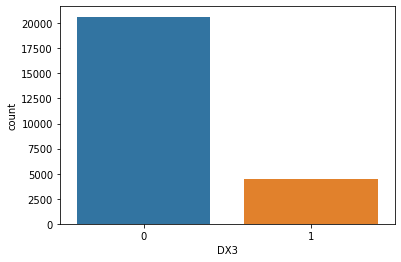

In [41]:
sns.countplot(pharma_drug_dummies['DX3'])
plt.show()

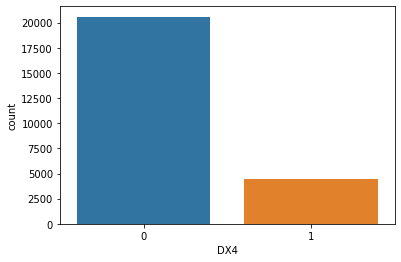

In [42]:
sns.countplot(pharma_drug_dummies['DX4'])
plt.show()

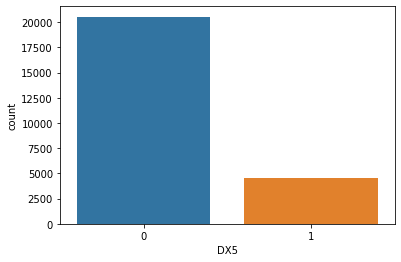

In [43]:
sns.countplot(pharma_drug_dummies['DX5'])
plt.show()

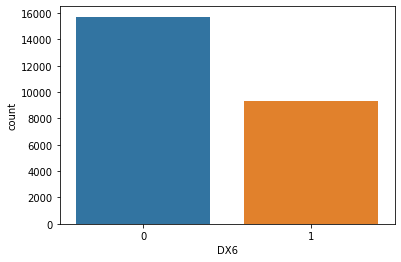

In [44]:
sns.countplot(pharma_drug_dummies['DX6'])
plt.show()

In the above 6 plots, 0 indicates that a patient did not use the corresponding drug while 1 indicates that the patient used the drug.

 It is observed that most patients used DX6 drug compared to the other drugs, which likely indicates that the use of DX6 drug positively influences the survival of a patient.

In [45]:
pharma_data = pd.concat([pharma_data, pharma_drug_dummies], axis=1)               #concatenate the dummy dataframe with the original dataframe

In [46]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           8
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
DX1                          0
DX2                          0
DX3                          0
DX4                          0
DX5                          0
DX6                          0
dtype: int64

In [47]:
pharma_data.drop(['Treated_with_drugs', 'ID_Patient_Care_Situation', 'Patient_ID'], axis=1, inplace=True)

In [48]:
pharma_data.head()

Diagnosed_Condition  Patient_Age  Patient_Body_Mass_Index  ...  DX4  DX5  DX6
0                   47           60                21.655523  ...    0    0    0
1                    3            2                28.852743  ...    0    0    1
2                    7           20                26.179725  ...    0    0    1
3                   31            8                22.638945  ...    0    0    1
4                   43           53                21.326131  ...    0    0    0

[5 rows x 21 columns]

In [49]:
print(pharma_data.dtypes)
print(pharma_data.shape)

Diagnosed_Condition           int64
Patient_Age                   int64
Patient_Body_Mass_Index     float64
Patient_Smoker                int64
Patient_Rural_Urban           int64
Patient_mental_condition      int64
A                           float64
B                           float64
C                           float64
D                           float64
E                           float64
F                           float64
Z                           float64
Number_of_prev_cond         float64
Survived_1_year               int64
DX1                           int64
DX2                           int64
DX3                           int64
DX4                           int64
DX5                           int64
DX6                           int64
dtype: object
(25079, 21)


In [50]:
#Split data into features(X) and target(y)
X = pharma_data.drop('Survived_1_year',axis=1)
y = pharma_data.Survived_1_year
X.head()

Diagnosed_Condition  Patient_Age  Patient_Body_Mass_Index  ...  DX4  DX5  DX6
0                   47           60                21.655523  ...    0    0    0
1                    3            2                28.852743  ...    0    0    1
2                    7           20                26.179725  ...    0    0    1
3                   31            8                22.638945  ...    0    0    1
4                   43           53                21.326131  ...    0    0    0

[5 rows x 20 columns]

## Split the data into train and test set and train the model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, \
    confusion_matrix, f1_score, roc_auc_score, recall_score

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Fit the data into various models and evaluate the performance of each

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("LogisticRegression model")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))

LogisticRegression model
Accuracy Score: 0.7309409888357257
F1 Score: 0.8028975347587336
Recall Score: 0.850284583024004


In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 7)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print("DecisionTreeClassifier model")
print("Accuracy Score:", accuracy_score(y_test, y_pred_dtc))
print("F1 Score:", f1_score(y_test, y_pred_dtc))
print("Recall Score:", recall_score(y_test, y_pred_dtc))

DecisionTreeClassifier model
Accuracy Score: 0.7945773524720893
F1 Score: 0.8398806563898558
Recall Score: 0.835931700074239


In [55]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators = 300, random_state = 0)
randf.fit(X_train, y_train)
y_pred_randf = randf.predict(X_test)
print("RandomForestClassifier model")
print("Accuracy Score:", accuracy_score(y_test, y_pred_randf))
print("F1 Score:", f1_score(y_test, y_pred_randf))
print("Recall Score:", recall_score(y_test, y_pred_randf))

RandomForestClassifier model
Accuracy Score: 0.8365231259968102
F1 Score: 0.8751978570558869
Recall Score: 0.8893838158871566


In [56]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoostClassifier model")
print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("Recall Score:", recall_score(y_test, y_pred_xgb))

XGBoostClassifier model
Accuracy Score: 0.8376395534290271
F1 Score: 0.8758839307485979
Recall Score: 0.8888888888888888


#Check model performance using new test data

In [57]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_advc.csv')
test_new.head()

ID_Patient_Care_Situation  Diagnosed_Condition  ...    Z Number_of_prev_cond
0                      24206                   35  ...  0.0                 2.0
1                      32827                   30  ...  0.0                 2.0
2                       3694                   46  ...  0.0                 1.0
3                       7164                   44  ...  0.0                 2.0
4                       1259                   30  ...  0.0                 1.0

[5 rows x 17 columns]

In [58]:
test_new.shape

(9330, 17)

In [59]:
test_new.Patient_Smoker.unique()

array(['NO', 'NO ', 'YES ', 'YES', 'YESS', 'YESS '], dtype=object)

In [60]:
patient_smoker_replace = {"NO ":"NO", "YES ":"YES", "YESS ":"YES", "YESS":"YES", "Cannot say ":"Cannot say", "CANNOT SAY ":"Cannot say", "CANNOT SAY":"Cannot say"}
test_new = test_new.replace({"Patient_Smoker": patient_smoker_replace})
test_new["Patient_Smoker"].replace({"NO":0, "YES":1, "Cannot say":2}, inplace=True)

In [61]:
test_new["Patient_Rural_Urban"].replace({"RURAL":0, "URBAN":1}, inplace=True)

In [62]:
test_new["Patient_mental_condition"].replace({"Stable": 1}, inplace=True)

In [63]:
test_new['Treated_with_drugs'] = test_new['Treated_with_drugs'].str.upper()  #change the values in this column to upppercase
test_drug_dummies = test_new['Treated_with_drugs'].str.get_dummies(sep=' ')   #create a dummy value
test_new = pd.concat([test_new, test_drug_dummies], axis=1)               #concatenate the dummy dataframe with the original dataframe

In [64]:
test_new.drop(['Treated_with_drugs', 'ID_Patient_Care_Situation', 'Patient_ID'], axis=1, inplace=True)

In [65]:
test_new.shape

(9330, 20)

## Predict patients survival using the created XGBoostClassifier model

In [66]:
Survived_1_year_xgb = xgb.predict(test_new)
Survived_1_year_xgb

array([1, 0, 0, ..., 0, 0, 1])

In [67]:
Survived_1_year_xgb_array = []
for i in Survived_1_year_xgb:
  Survived_1_year_xgb_array.append(i)
print(Survived_1_year_xgb_array)

[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

In [68]:
result = pd.DataFrame(Survived_1_year_xgb) #predictions are nothing but the final predictions of your model on input features of your new unseen test data
result.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
result.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
result.to_csv('Survived_1_year_results.csv')         
# files.download('Survived_1_year_results.csv')

##Predict patients survival using the created random forest classifier model


In [69]:
Survived_1_year_randf = randf.predict(test_new)
Survived_1_year_randf

array([1, 1, 0, ..., 0, 0, 1])

In [70]:
Survived_1_year_randf_array = []
for i in Survived_1_year_randf:
  Survived_1_year_randf_array.append(i)
print(Survived_1_year_randf_array)

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 

##Predict patients survival using the created decision tree classifier model

In [71]:
Survived_1_year_dtc = dtc.predict(test_new)
Survived_1_year_dtc

array([1, 1, 0, ..., 1, 0, 1])

In [72]:
Survived_1_year_dtc_array = []
for i in Survived_1_year_dtc:
  Survived_1_year_dtc_array.append(i)
print(Survived_1_year_dtc_array)

[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 

##Predict patients survival using the created logistic regression model

In [73]:
Survived_1_year_lr = lr.predict(test_new)
Survived_1_year_lr

array([1, 1, 0, ..., 1, 1, 1])

In [74]:
Survived_1_year_lr_array = []
for i in Survived_1_year_lr:
  Survived_1_year_lr_array.append(i)
print(Survived_1_year_lr_array)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 

## XGBoost classifier model has given the best results, this will be our final model for test_new predictions.

##Evaluate model performance with grid search



In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [76]:
# grid_search = GridSearchCV(estimator = xgb, param_grid = parameters, 
#                           cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train, y_train)

In [77]:
# best_parameters = grid.best_params_
# print(best_parameters)

Hyperparameter tuning takes a long time to run

##Evaluate model performance with randomized search

In [78]:
from sklearn.model_selection import RandomizedSearchCV
random_grid_param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [79]:
# xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid_param, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
# xgb_random.fit(X_train, y_train)

In [80]:
# best_parameters = xgb_random.best_params_
# print(best_parameters)

Hyperparameter tuning takes a long time to run